# Initial testing of how well three unsupervised learning algorithms work on a few data points for FRBS

Algorithms considered:
1. K-means
2. Hierarchical 
3. DBSCAN

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import sklearn.cluster as cl
from sklearn import metrics

In [3]:
import matplotlib.pyplot as plt
from scipy import ndimage

In [6]:
#W     pulse width in ms
# DM    dispersion measure in cm-3 pc
# Speak peak flux density in units of Jy
# f     frequency at which Speak is measured in GHz
# RA    J2000 right ascension hh:mm
# DEC   J2000 declination dd:mm
# UTC   Universal Coordinated Time at which burst arrived on yy mm dd
# Telescope - the telescope which observed the FRB
# Year - the year in which the burst was discovered (not necessarily = yy!)
# refs - bibliographic ta
#W, DM, Speak,f,RA,DEC,UTC,Tele,Year,refs = np.loadtxt('FRBs.txt', unpack = True)
#f = open('FRBs.txt', 'r')
name, W, DM = np.loadtxt("FRBs.txt", comments="#", unpack=True, usecols = [0,1,2])

## K Means Clustering

[  10621.   10724.   11025.  110220.  110627.  110703.  120127.  121002.
  121102.  140514.  131104.  150908.] [ 7.8   4.6   9.4   5.6   1.4   4.3   1.1   2.9   3.    2.8   2.    1.73] [  746.    375.    790.    944.    723.   1104.    553.   1629.    557.
   562.7   779.    623.3]


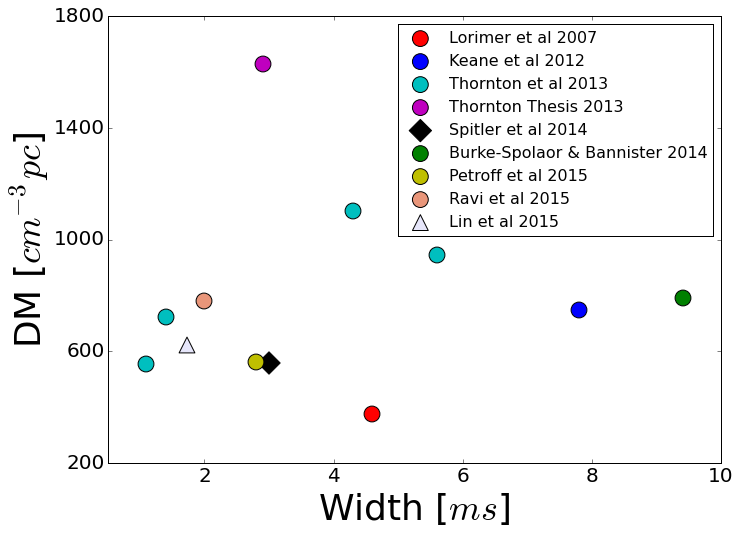

In [9]:
print name, W, DM

plt.figure(figsize=(11,8))
plt.scatter(W[1],DM[1],s=250, c='r',edgecolors='black', label = 'Lorimer et al 2007')
plt.scatter(W[0],DM[0],s=250, c='b',edgecolors='black', label = 'Keane et al 2012')#, ms = 10, cmap='autumn_r')


plt.scatter(W[3:7],DM[3:7],s=250, c='c',edgecolors='black', label = 'Thornton et al 2013')
plt.xlabel(r'Width [$ms$]',fontsize=36 )
plt.ylabel(r'DM [$cm^{-3} pc$]', fontsize=36)## what about that 3.7??
#plt.yscale('log')

#plt.savefig('Data.pdf')
plt.scatter(W[7],DM[7],s=250, c='m',edgecolors='black', label = 'Thornton Thesis 2013')
plt.scatter(W[8],DM[8],s=250, marker = 'D', c='k',edgecolors='black', label = 'Spitler et al 2014')
plt.scatter(W[2],DM[2],s=250, c='g',edgecolors='black', label = 'Burke-Spolaor & Bannister 2014')
plt.scatter(W[9],DM[9],s=250, c='y',edgecolors='black', label = 'Petroff et al 2015')
plt.scatter(W[10],DM[10],s=250, c='darksalmon',edgecolors='black', label = 'Ravi et al 2015')
plt.scatter(W[11],DM[11], s=250, marker = '^', c = 'Lavender',edgecolors='black', label = 'Lin et al 2015' )

#plt.xscale("log")
#plt.yscale("log")
plt.xlim(0.5, 10)
plt.xticks(fontsize = 20)
plt.yticks(np.linspace(200, 1800, 5), fontsize = 20)
plt.legend( scatterpoints=1, loc = 1, fontsize=16)
#plt.savefig('/Users/karaponder/FRB/Data_time.pdf')
#print W
#print DM

1.45426582539
187.30829919


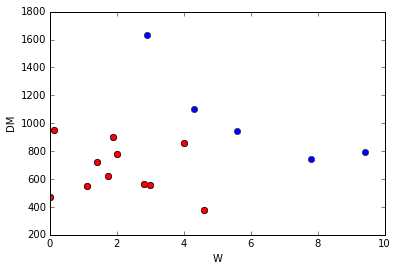

In [25]:
#Manually clustering and finding standard deviations
whwidth = np.where(W<=5)
wtemp = W[whwidth]
dmtemp = DM[whwidth]
whdm = np.where(dmtemp<=1000)
w_clust1 = wtemp[whdm]
dm_clust1 = dmtemp[whdm]
plt.plot(W,DM,'bo')
plt.plot(w_clust1,dm_clust1,'ro')
#plt.show()
plt.xlabel('W')
plt.ylabel('DM')
print np.std(w_clust1,ddof=1)
print np.std(dm_clust1,ddof=1)

#plt.savefig('/Users/karaponder/FRB/20151128_newfrbs_newcluster.pdf')

In [13]:
est = cl.KMeans(2, init='random',n_init=10 )

In [14]:
X = np.array(zip(W,DM))
print X.shape

(16, 2)


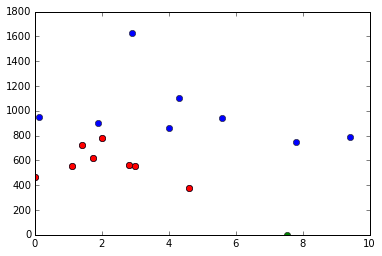

(7.5286522315440383, 0.9958285564428403)


In [15]:
com = ndimage.measurements.center_of_mass(X)

whwidth = np.where(W<=5)
wtemp = W[whwidth]
dmtemp = DM[whwidth]
whdm = np.where(dmtemp<=800)
w_clust1 = wtemp[whdm]
dm_clust1 = dmtemp[whdm]

plt.plot(com[0], com[1], 'go')
plt.plot(W,DM,'bo')
plt.plot(w_clust1,dm_clust1,'ro')
plt.show()

print com


In [16]:
est.fit(X)
centers = est.cluster_centers_
inertia = est.inertia_
print centers,'\n\n',inertia

[[    3.31666667   729.32533333]
 [    2.9         1629.        ]] 

581779.519907


In [17]:
y_kmeans = est.fit_predict(X)
print y_kmeans

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1]


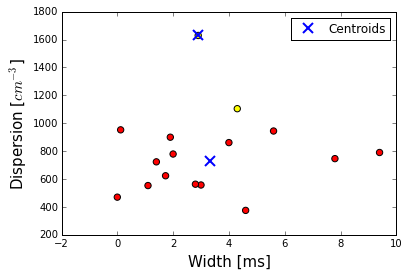

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap='autumn_r', s=40);
plt.plot(centers[:,0],centers[:,1],'bx',ms=10,mew=2,label='Centroids');
plt.xlabel('Width [ms]',fontsize=15)
plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15)
plt.legend(numpoints=1);

## Hierarchical (Agglomerative) Clustering

In [19]:
est_HC = cl.AgglomerativeClustering(n_clusters = 2)

In [20]:
est_HC.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2, n_components=None,
            pooling_func=<function mean at 0x1034857d0>)

In [21]:
y_HC = est_HC.fit_predict(X)

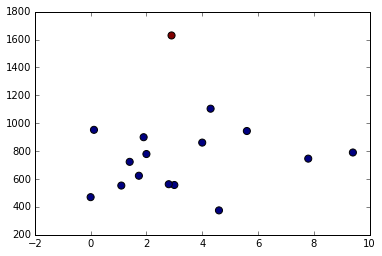

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_HC, s=50)

## DBSCAN 

[ 0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0] 
# Clusters =  1
Silhouette Coefficient:  0.668766520177


/Users/karaponder/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/karaponder/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


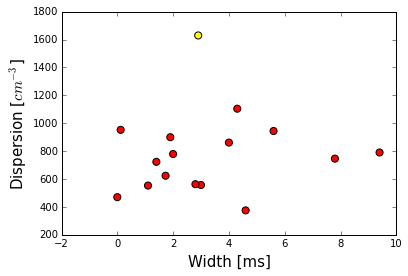

In [23]:
est_DB = cl.DBSCAN(eps=200,min_samples=2)
est_DB.fit(X)
y_DB = est_DB.fit_predict(X)

#Clusters
labels= est_DB.labels_
n_clusters = len(set(labels))-(1 if -1 in labels else 0)   #-1 indicate outliers/noise
print labels,'\n','# Clusters = ',n_clusters

#Silhouette Coefficient (1 => good, -1 => bad, 0 => overlapping clusters)
print 'Silhouette Coefficient: ',metrics.silhouette_score(X,labels)

plt.scatter(X[:, 0], X[:, 1], c=y_DB, cmap='autumn_r',s=50);
#plt.imshow(y_DB)
plt.xlabel('Width [ms]',fontsize=15);
plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15);

In [21]:
Y = np.delete(X, 8, 0)


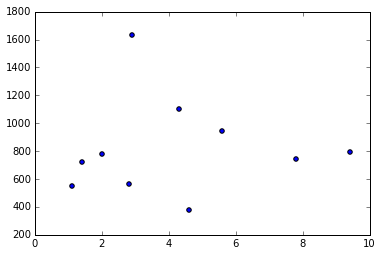

In [18]:
plt.scatter(Y[:, 0], Y[:, 1])

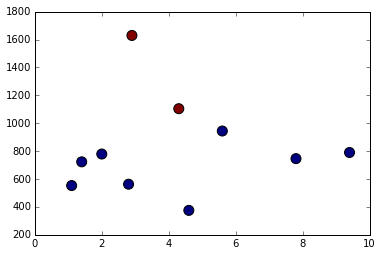

In [19]:
# K means
est = cl.KMeans(2)
est.fit(Y)
y_kmeans = est.predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans, s=100)

/Users/karaponder/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:763: DeprecationWarning: The Ward class is deprecated since 0.14 and will be removed in 0.17. Use the AgglomerativeClustering instead.
  "instead.", DeprecationWarning)


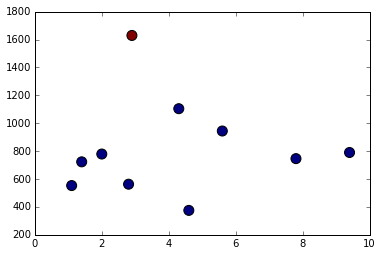

In [20]:
# Hierarchical
est_HC = cl.Ward(n_clusters = 2)
est_HC.fit(Y)
y_HC = est_HC.fit_predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=y_HC, s=100)

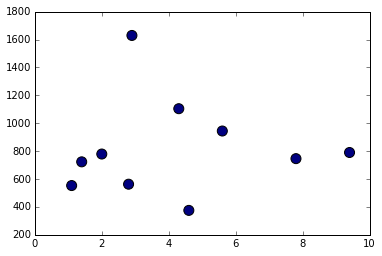

In [21]:
#DB SCAN
est_DB = cl.DBSCAN()
est_DB.fit(Y)
y_DB = est_DB.fit_predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c=y_DB, s=100)

In [22]:
from sklearn import mixture

In [23]:
dpgmm = mixture.DPGMM(n_components=5, covariance_type='full')
dpgmm.fit(X)


DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=5, n_iter=10, params='wmc',
   random_state=<mtrand.RandomState object at 0x105c8c450>, thresh=0.01,
   verbose=False)

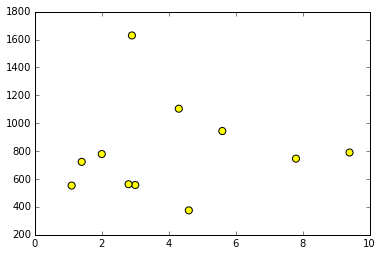

In [24]:
y_DPGMM = dpgmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_DPGMM, cmap='autumn_r',s=50)

In [25]:
gmm = mixture.GMM(n_components=2, covariance_type='full')
gmm.fit(X)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=0.01)

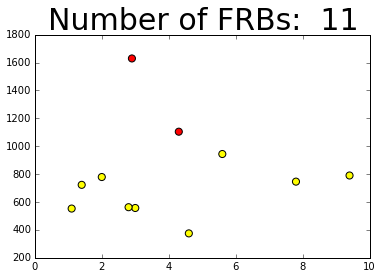

In [26]:
y_GMM = gmm.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_GMM, cmap='autumn_r',s=50)
plt.title('Number of FRBs:  %s'%len(X), fontsize = 30)